In [1]:
import csv
import pandas as pd
from pandas import *
from __future__ import division
from pandas.tseries.offsets import *
import dateutil.rrule as dr
import dateutil.parser as dp
import dateutil.relativedelta as drel
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None

## Loading files

In [3]:
#spd = read_csv('http://real-chart.finance.yahoo.com/table.csv?s=%5EGSPC&a=00&b=1&c=1974&d=05&e=19&f=2015&g=d&ignore=.csv',
#               delimiter=',', header=0, 
#               names=['date','o','h','l','close','vol','c'])
#spw = read_csv('http://real-chart.finance.yahoo.com/table.csv?s=%5EGSPC&a=00&b=1&c=1974&d=05&e=19&f=2015&g=w&ignore=.csv',
#               delimiter=',', header=0, 
#               names=['date','o','h','l','close','vol','c'])

#http://real-chart.finance.yahoo.com/table.csv?s=DAL&a=04&b=3&c=2008&d=05&e=9&f=2015&g=d&ignore=.csv
#http://real-chart.finance.yahoo.com/table.csv?s=%5EGSPC&a=00&b=1&c=1974&d=05&e=9&f=2015&g=d&ignore=.csv

### Insert row for date = 2001-09-17 (missing in yahoo data) in spw after download (append + concat)

In [4]:
#spd.to_csv('spd.csv')
#spw.to_csv('spw.csv')

In [5]:
spd = read_csv('spd.csv', delimiter=',', header=0, usecols=[1,2,3,4,5,6,7])
spw = read_csv('spw.csv', delimiter=',', header=0, usecols=[1,2,3,4,5,6,7])

In [6]:
spw.iloc[715:719]

date            o            h            l        close  \
715  2001-10-01  1040.939941  1084.119995  1026.760010  1071.380005   
716  2001-09-24   965.799988  1040.939941   965.799988  1040.939941   
717  2001-09-17  1092.540039  1092.540039   944.750000   965.799988   
718  2001-09-10  1085.780029  1096.939941  1073.150024  1092.540039   

            vol            c  
715  1405360000  1071.380005  
716  1595600000  1040.939941  
717  6182790000   965.799988  
718  1276600000  1092.540039

In [7]:
#spd.rename(columns={'Unnamed: 0':'nrow'}, inplace=True)
#spw.rename(columns={'Unnamed: 0':'nrow'}, inplace=True)

In [8]:
spd['date'] = pd.to_datetime(spd['date'])
spw['date'] = pd.to_datetime(spw['date'])
print type(spd.date[0]), type(spw.date[0])

<class 'pandas.tslib.Timestamp'> <class 'pandas.tslib.Timestamp'>


In [9]:
spd.head(3)

date            o            h            l        close         vol  \
0 2015-06-19  2121.060059  2121.639893  2109.449951  2109.989990  4449810000   
1 2015-06-18  2101.580078  2126.649902  2101.580078  2121.239990  3520360000   
2 2015-06-17  2097.399902  2106.790039  2088.860107  2100.439941  3222240000   

             c  
0  2109.989990  
1  2121.239990  
2  2100.439941

In [10]:
spd.tail(3)

date          o           h          l      close       vol  \
10459 1974-01-04  99.800003  100.699997  97.699997  98.900002  21700000   
10460 1974-01-03  98.019997  100.940002  98.019997  99.800003  24850000   
10461 1974-01-02  97.550003   98.379997  96.250000  97.680000  12060000   

               c  
10459  98.900002  
10460  99.800003  
10461  97.680000

In [11]:
spw.head(3)

date            o            h            l        close         vol  \
0 2015-06-15  2091.340088  2126.649902  2072.489990  2109.989990  3434776000   
1 2015-06-08  2092.340088  2115.020020  2072.139893  2094.110107  3042810000   
2 2015-06-01  2108.639893  2121.919922  2085.669922  2092.830078  3120956000   

             c  
0  2109.989990  
1  2094.110107  
2  2092.830078

In [12]:
spw.tail(3)

date          o           h          l      close       vol  \
2161 1974-01-14  93.660004   98.349998  92.349998  95.559998  16060000   
2162 1974-01-07  98.900002   99.309998  91.620003  93.660004  17296000   
2163 1974-01-02  97.550003  100.940002  96.250000  98.900002  19536600   

              c  
2161  95.559998  
2162  93.660004  
2163  98.900002

In [13]:
len(spd)

10462

In [14]:
len(spw)

2164

In [15]:
for i in range(len(spw.date)):
    spw.date[i] = spw.date[i] + DateOffset(weekday = 4)

In [16]:
spw.head(3)

date            o            h            l        close         vol  \
0 2015-06-19  2091.340088  2126.649902  2072.489990  2109.989990  3434776000   
1 2015-06-12  2092.340088  2115.020020  2072.139893  2094.110107  3042810000   
2 2015-06-05  2108.639893  2121.919922  2085.669922  2092.830078  3120956000   

             c  
0  2109.989990  
1  2094.110107  
2  2092.830078

In [17]:
spw.tail(3)

date          o           h          l      close       vol  \
2161 1974-01-18  93.660004   98.349998  92.349998  95.559998  16060000   
2162 1974-01-11  98.900002   99.309998  91.620003  93.660004  17296000   
2163 1974-01-04  97.550003  100.940002  96.250000  98.900002  19536600   

              c  
2161  95.559998  
2162  93.660004  
2163  98.900002

## Moving Averages

In [18]:
d12 = []
d24 = []
d48 = []
d72 = []
d96 = []
d192 = []
d288 = []
for i in range(len(spd)-288):
    d12.append(sum(spd.c[i:(i+12)])/12)
    d24.append(sum(spd.c[i:(i+24)])/24)
    d48.append(sum(spd.c[i:(i+48)])/48)
    d72.append(sum(spd.c[i:(i+72)])/72)
    d96.append(sum(spd.c[i:(i+96)])/96)
    d192.append(sum(spd.c[i:(i+192)])/192)
    d288.append(sum(spd.c[i:(i+288)])/288)
    
d192[-1]

75.564843718750026

In [19]:
w12 = []
w24 = []
w48 = []
w72 = []
w96 = []
w192 = []
w288 = []
for i in range(len(spw)-288):
    w12.append(sum(spw.c[i:(i+12)])/12)
    w24.append(sum(spw.c[i:(i+24)])/24)
    w48.append(sum(spw.c[i:(i+48)])/48)
    w72.append(sum(spw.c[i:(i+72)])/72)
    w96.append(sum(spw.c[i:(i+96)])/96)
    w192.append(sum(spw.c[i:(i+192)])/192)
    w288.append(sum(spw.c[i:(i+288)])/288)
    
w192[-1]

98.690937416666671

## Indicators

In [20]:
ltd = []
for i in range(len(spd)-288):
    t12 = ((spd.c[i]/(sum(spd.c[(i+6):(i+12)])/6)-1)*100)
    t24 = ((spd.c[i]/(sum(spd.c[(i+18):(i+24)])/6)-1)*100)
    t48 = ((spd.c[i]/(sum(spd.c[(i+42):(i+48)])/6)-1)*100)
    t72 = ((spd.c[i]/(sum(spd.c[(i+66):(i+72)])/6)-1)*100)
    t96 = ((spd.c[i]/(sum(spd.c[(i+90):(i+96)])/6)-1)*100)
    t192 = ((spd.c[i]/(sum(spd.c[(i+186):(i+192)])/6)-1)*100)
    t288 = ((spd.c[i]/(sum(spd.c[(i+282):(i+288)])/6)-1)*100)
    ltd.append((t12+t24+t48+t72+t96+t192+t288)/7)
ltd.extend([0]*288)

In [21]:
ltw = []
for i in range(len(spw)-288):
    t12 = ((spw.c[i]/(sum(spw.c[(i+6):(i+12)])/6)-1)*100)
    t24 = ((spw.c[i]/(sum(spw.c[(i+18):(i+24)])/6)-1)*100)
    t48 = ((spw.c[i]/(sum(spw.c[(i+42):(i+48)])/6)-1)*100)
    t72 = ((spw.c[i]/(sum(spw.c[(i+66):(i+72)])/6)-1)*100)
    t96 = ((spw.c[i]/(sum(spw.c[(i+90):(i+96)])/6)-1)*100)
    t192 = ((spw.c[i]/(sum(spw.c[(i+186):(i+192)])/6)-1)*100)
    t288 = ((spw.c[i]/(sum(spw.c[(i+282):(i+288)])/6)-1)*100)
    ltw.append((t12+t24+t48+t72+t96+t192+t288)/7)
ltw.extend([0]*288)

In [22]:
print max(ltd), min(ltd), max(ltw), min (ltw)

23.3328697298 -35.6366112059 71.7672905826 -41.5810392106


In [23]:
print ltd.index(max(ltd)), ltd.index(min(ltd)), ltw.index(max(ltw)), ltw.index(min(ltw))

8099 1654 883 328


In [24]:
lc288d = []
lc72d = []
for i in range(len(spd)-288):
    min12 = ((spd.c[i]/min(spd.c[(i+6):(i+12)]))-1)*100
    max12 = ((spd.c[i]/max(spd.c[(i+6):(i+12)]))-1)*100
    min24 = ((spd.c[i]/min(spd.c[(i+18):(i+24)]))-1)*100
    max24 = ((spd.c[i]/max(spd.c[(i+18):(i+24)]))-1)*100
    min48 = ((spd.c[i]/min(spd.c[(i+42):(i+48)]))-1)*100
    max48 = ((spd.c[i]/max(spd.c[(i+42):(i+48)]))-1)*100
    min72 = ((spd.c[i]/min(spd.c[(i+66):(i+72)]))-1)*100
    max72 = ((spd.c[i]/max(spd.c[(i+66):(i+72)]))-1)*100
    min96 = ((spd.c[i]/min(spd.c[(i+90):(i+96)]))-1)*100
    max96 = ((spd.c[i]/max(spd.c[(i+90):(i+96)]))-1)*100
    min192 = ((spd.c[i]/min(spd.c[(i+186):(i+192)]))-1)*100
    max192 = ((spd.c[i]/max(spd.c[(i+186):(i+192)]))-1)*100
    min288 = ((spd.c[i]/min(spd.c[(i+282):(i+288)]))-1)*100
    max288 = ((spd.c[i]/max(spd.c[(i+282):(i+288)]))-1)*100
    
    clong288 = 0
    clong72 = 0
    cshort288 = 0
    cshort72 = 0
    
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+12])/12:
        contatl += 1
    if spd.c[i] > spd.c[i+12]:
        contatl += 1
    if max12 > 0:
        contatl += 1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+12])/12:
        contats -= 1
    if spd.c[i] < spd.c[i+12]:
        contats -= 1
    if min12 < 0:
        contats -= 1
    if contatl == 3 or contats == -3:
        c12 = (((sum(spd.c[i:(i+12)])/12)/spd.c[i])-1)*100
    else:
        c12 = 0
    if contatl == 3:
        clong288 += 1
        clong72 += 1
    if contats == -3:
        cshort288 += 1
        cshort72 += 1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+24])/24:
        contatl +=1
    if spd.c[i] > spd.c[i+24]:
        contatl +=1
    if max24 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+24])/24:
        contats -=1
    if spd.c[i] < spd.c[i+24]:
        contats -=1
    if min24 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c24 = (((sum(spd.c[i:(i+24)])/24)/spd.c[i])-1)*100
    else:
        c24 = 0
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+48])/48:
        contatl +=1
    if spd.c[i] > spd.c[i+48]:
        contatl +=1
    if max48 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+48])/48:
        contats -=1
    if spd.c[i] < spd.c[i+48]:
        contats -=1
    if min48 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c48 = (((sum(spd.c[i:(i+48)])/48)/spd.c[i])-1)*100
    else:
        c48 = 0    
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+72])/72:
        contatl +=1
    if spd.c[i] > spd.c[i+72]:
        contatl +=1
    if max72 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+72])/72:
        contats -=1
    if spd.c[i] < spd.c[i+72]:
        contats -=1
    if min72 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c72 = (((sum(spd.c[i:(i+72)])/72)/spd.c[i])-1)*100
    else:
        c72 = 0  
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+96])/96:
        contatl +=1
    if spd.c[i] > spd.c[i+96]:
        contatl +=1
    if max96 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+96])/96:
        contats -=1
    if spd.c[i] < spd.c[i+96]:
        contats -=1
    if min96 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c96 = (((sum(spd.c[i:(i+96)])/96)/spd.c[i])-1)*100
    else:
        c96 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+192])/192:
        contatl +=1
    if spd.c[i] > spd.c[i+192]:
        contatl +=1
    if max192 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+192])/192:
        contats -=1
    if spd.c[i] < spd.c[i+192]:
        contats -=1
    if min192 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c192 = (((sum(spd.c[i:(i+192)])/192)/spd.c[i])-1)*100
    else:
        c192 = 0      
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spd.c[i] < sum(spd.c[i:i+288])/288:
        contatl +=1
    if spd.c[i] > spd.c[i+288]:
        contatl +=1
    if max288 > 0:
        contatl +=1
    contats = 0
    if spd.c[i] > sum(spd.c[i:i+288])/288:
        contats -=1
    if spd.c[i] < spd.c[i+288]:
        contats -=1
    if min288 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c288 = (((sum(spd.c[i:(i+288)])/288)/spd.c[i])-1)*100
    else:
        c288 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 += 1

    if (clong288 + cshort288) > 0:
        ctot288 = (clong288 + cshort288)
    else:
        ctot288 = 1
    lc288d.append((c12+c24+c48+c72+c96+c192+c288)/ctot288)
    
    if (clong72 + cshort72) > 0:
        ctot72 = (clong72 + cshort72)
    else:
        ctot72 = 1
    lc72d.append((c12+c24+c48+c72)/ctot72)
lc288d.extend([0]*288)
lc72d.extend([0]*288)

In [25]:
print max(lc288d), min(lc288d), max(lc72d), min(lc72d)

17.8730823251 -15.6973020039 4.46218418268 -6.65612308983


In [26]:
print lc288d.index(max(lc288d)), lc288d.index(min(lc288d)), lc72d.index(max(lc72d)), lc72d.index(min(lc72d))

6958 1409 9246 1554


In [27]:
print spd.date[1644]

2008-12-05 00:00:00


In [28]:
print lc288d[0], lc72d[0]

0.0 0.0


In [29]:
lc288w = []
lc72w = []
for i in range(len(spw)-288):
    min12 = ((spw.c[i]/min(spw.c[(i+6):(i+12)]))-1)*100
    max12 = ((spw.c[i]/max(spw.c[(i+6):(i+12)]))-1)*100
    min24 = ((spw.c[i]/min(spw.c[(i+18):(i+24)]))-1)*100
    max24 = ((spw.c[i]/max(spw.c[(i+18):(i+24)]))-1)*100
    min48 = ((spw.c[i]/min(spw.c[(i+42):(i+48)]))-1)*100
    max48 = ((spw.c[i]/max(spw.c[(i+42):(i+48)]))-1)*100
    min72 = ((spw.c[i]/min(spw.c[(i+66):(i+72)]))-1)*100
    max72 = ((spw.c[i]/max(spw.c[(i+66):(i+72)]))-1)*100
    min96 = ((spw.c[i]/min(spw.c[(i+90):(i+96)]))-1)*100
    max96 = ((spw.c[i]/max(spw.c[(i+90):(i+96)]))-1)*100
    min192 = ((spw.c[i]/min(spw.c[(i+186):(i+192)]))-1)*100
    max192 = ((spw.c[i]/max(spw.c[(i+186):(i+192)]))-1)*100
    min288 = ((spw.c[i]/min(spw.c[(i+282):(i+288)]))-1)*100
    max288 = ((spw.c[i]/max(spw.c[(i+282):(i+288)]))-1)*100
    
    clong288 = 0
    clong72 = 0
    cshort288 = 0
    cshort72 = 0
    
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+12])/12:
        contatl += 1
    if spw.c[i] > spw.c[i+12]:
        contatl += 1
    if max12 > 0:
        contatl += 1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+12])/12:
        contats -= 1
    if spw.c[i] < spw.c[i+12]:
        contats -= 1
    if min12 < 0:
        contats -= 1
    if contatl == 3 or contats == -3:
        c12 = (((sum(spw.c[i:(i+12)])/12)/spw.c[i])-1)*100
    else:
        c12 = 0
    if contatl == 3:
        clong288 += 1
        clong72 += 1
    if contats == -3:
        cshort288 += 1
        cshort72 += 1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+24])/24:
        contatl +=1
    if spw.c[i] > spw.c[i+24]:
        contatl +=1
    if max24 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+24])/24:
        contats -=1
    if spw.c[i] < spw.c[i+24]:
        contats -=1
    if min24 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c24 = (((sum(spw.c[i:(i+24)])/24)/spw.c[i])-1)*100
    else:
        c24 = 0
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+48])/48:
        contatl +=1
    if spw.c[i] > spw.c[i+48]:
        contatl +=1
    if max48 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+48])/48:
        contats -=1
    if spw.c[i] < spw.c[i+48]:
        contats -=1
    if min48 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c48 = (((sum(spw.c[i:(i+48)])/48)/spw.c[i])-1)*100
    else:
        c48 = 0    
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+72])/72:
        contatl +=1
    if spw.c[i] > spw.c[i+72]:
        contatl +=1
    if max72 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+72])/72:
        contats -=1
    if spw.c[i] < spw.c[i+72]:
        contats -=1
    if min72 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c72 = (((sum(spw.c[i:(i+72)])/72)/spw.c[i])-1)*100
    else:
        c72 = 0  
    if contatl == 3:
        clong288 +=1
        clong72 +=1
    if contats == -3:
        cshort288 +=1
        cshort72 +=1
    
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+96])/96:
        contatl +=1
    if spw.c[i] > spw.c[i+96]:
        contatl +=1
    if max96 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+96])/96:
        contats -=1
    if spw.c[i] < spw.c[i+96]:
        contats -=1
    if min96 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c96 = (((sum(spw.c[i:(i+96)])/96)/spw.c[i])-1)*100
    else:
        c96 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+192])/192:
        contatl +=1
    if spw.c[i] > spw.c[i+192]:
        contatl +=1
    if max192 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+192])/192:
        contats -=1
    if spw.c[i] < spw.c[i+192]:
        contats -=1
    if min192 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c192 = (((sum(spw.c[i:(i+192)])/192)/spw.c[i])-1)*100
    else:
        c192 = 0      
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 +=1
        
    contatl = 0
    if spw.c[i] < sum(spw.c[i:i+288])/288:
        contatl +=1
    if spw.c[i] > spw.c[i+288]:
        contatl +=1
    if max288 > 0:
        contatl +=1
    contats = 0
    if spw.c[i] > sum(spw.c[i:i+288])/288:
        contats -=1
    if spw.c[i] < spw.c[i+288]:
        contats -=1
    if min288 < 0:
        contats -=1
    if contatl == 3 or contats == -3:
        c288 = (((sum(spw.c[i:(i+288)])/288)/spw.c[i])-1)*100
    else:
        c288 = 0
    if contatl == 3:
        clong288 +=1
    if contats == -3:
        cshort288 += 1

    if (clong288 + cshort288) > 0:
        ctot288 = (clong288 + cshort288)
    else:
        ctot288 = 1
    lc288w.append((c12+c24+c48+c72+c96+c192+c288)/ctot288)
    
    if (clong72 + cshort72) > 0:
        ctot72 = (clong72 + cshort72)
    else:
        ctot72 = 1
    lc72w.append((c12+c24+c48+c72)/ctot72)
lc288w.extend([0]*288)
lc72w.extend([0]*288)

In [30]:
print max(lc288w), min(lc288w), max(lc72w), min(lc72w)

42.2414306189 -15.0945826014 9.81403381868 -13.8656712573


In [31]:
print lc288w.index(max(lc288w)), lc288w.index(min(lc288w)), lc72w.index(max(lc72w)), lc72w.index(min(lc72w))

664 216 1428 286


In [32]:
print spw.date[214]

2011-05-13 00:00:00


In [33]:
print lc288w[0], lc72w[0]

0.0 0.0


In [34]:
ldd = []
for i in range(len(spd)-288):
    ld = (((d12[i]*12)+(d24[i]*24)+(d48[i]*48)+(d72[i]*72)+(d96[i]*96)+(d192[i]*192)+(d288[i]*288))/732)
    ldd.append(((ld/spd.c[i])-1)*100)
ldd.extend([0]*288)

In [35]:
print max(ldd), min(ldd)

60.3588415804 -16.6628292676


In [36]:
print ldd.index(max(ldd)), ldd.index(min(ldd))

1654 8227


In [37]:
print spd.date[8217]

1982-11-17 00:00:00


In [38]:
print ldd[0]

-2.61936157337


In [39]:
ldw = []
for i in range(len(spw)-288):
    ld = (((w12[i]*12)+(w24[i]*24)+(w48[i]*48)+(w72[i]*72)+(w96[i]*96)+(w192[i]*192)+(w288[i]*288))/732)
    ldw.append(((ld/spw.c[i])-1)*100)
ldw.extend([0]*288)

In [40]:
print max(ldw), min(ldw)

79.734825175 -34.8467525679


In [41]:
print ldw.index(max(ldw)), ldw.index(min(ldw))

328 898


In [42]:
print spw.date[326]

2009-03-20 00:00:00


In [43]:
print ldw[0]

-18.1499495896


In [44]:
lmd = []
for i in range(len(spd)-288):
    lm = 0
    if spd.c[i] > d96[i] and spd.c[i] > d288[i]:
        lm = 1
    elif spd.c[i] < d96[i] and spd.c[i] < d288[i]:
        lm = -1
    lmd.append(lm)
lmd.extend([0]*288)

In [45]:
print max(lmd), min(lmd)

1 -1


In [46]:
print sum(lmd)/len(lmd)

0.421047600841


In [47]:
print lmd[0]

1


In [48]:
lmw = []
for i in range(len(spw)-288):
    lm = 0
    if spw.c[i] > w96[i] and spw.c[i] > w288[i]:
        lm = 1
    elif spw.c[i] < w96[i] and spw.c[i] < w288[i]:
        lm = -1
    lmw.append(lm)    
lmw.extend([0]*288)

In [49]:
print max(lmw), min(lmw)

1 -1


In [50]:
print sum(lmw)/len(lmw)

0.551756007394


In [51]:
print lmw[0]

1


In [52]:
spd['lixt'] = ltd
spd['lixc72'] = lc72d
spd['lixc288'] = lc288d
spd['lixd'] = ldd
spd['lixm'] = lmd
spd.head(3)

date            o            h            l        close         vol  \
0 2015-06-19  2121.060059  2121.639893  2109.449951  2109.989990  4449810000   
1 2015-06-18  2101.580078  2126.649902  2101.580078  2121.239990  3520360000   
2 2015-06-17  2097.399902  2106.790039  2088.860107  2100.439941  3222240000   

             c      lixt  lixc72  lixc288      lixd  lixm  
0  2109.989990  3.371532       0        0 -2.619362     1  
1  2121.239990  3.950901       0        0 -3.166602     1  
2  2100.439941  3.012487       0        0 -2.246367     1

In [53]:
spw['lixt'] = ltw
spw['lixc72'] = lc72w
spw['lixc288'] = lc288w
spw['lixd'] = ldw
spw['lixm'] = lmw
spw.head(3)

date            o            h            l        close         vol  \
0 2015-06-19  2091.340088  2126.649902  2072.489990  2109.989990  3434776000   
1 2015-06-12  2092.340088  2115.020020  2072.139893  2094.110107  3042810000   
2 2015-06-05  2108.639893  2121.919922  2085.669922  2092.830078  3120956000   

             c       lixt  lixc72  lixc288       lixd  lixm  
0  2109.989990  30.155243       0        0 -18.149950     1  
1  2094.110107  29.196579       0        0 -17.718657     1  
2  2092.830078  29.583573       0        0 -17.847919     1

## Building samples dataset (predict all months of the quarter)

In [54]:
exp = []
d = dp.parse("20/06/2015")
while d > dp.parse("17/01/1980"):
    d = d - WeekOfMonth(weekday = 4, week = 2)
    exp.append(d)
    d = d - DateOffset(days = 20)

len(exp)
expdates = exp

In [55]:
q1c = []
q1cstd = []
q1high = []
q1low = []
q1range = []
q1middle = []
q1pos = []
q0c = []
q0cstd = []
q0high = []
q0low = []
q0spanmean = []
q0spanstd = []
q0lixt = []
q0lixc72 = []
q0lixc288 = []
q0lixd = []
q0lixm = []
q0lixtv = []
q0lixc72v = []
q0lixc288v = []
q0lixdv = []
q0lixmv = []
m0c = []
m0cstd = []
m0high = []
m0low = []
m0spanmean = []
m0spanstd = []
m0lixt = []
m0lixc72 = []
m0lixc288 = []
m0lixd = []
m0lixm = []
m0lixtv = []
m0lixc72v = []
m0lixc288v = []
m0lixdv = []
m0lixmv = []

In [56]:
for q1end in exp:
    
    #q1start = q1end - DateOffset(weeks = 4) + DateOffset(days = 1) - BDay()
    q1start = q1end - DateOffset(weeks = 4)
    m0start = q1start - DateOffset(weeks = 4)
    q0start = q1start - DateOffset(weeks = 13)
    
    q1startd = q1start
    m0startd = m0start
    q0startd = q0start
    if spd.date[spd.date == q1startd].empty:
        while spd.date[spd.date == q1startd].empty:
            q1startd = q1startd - DateOffset(days = 1)
    if spd.date[spd.date == m0startd].empty:
        while spd.date[spd.date == m0startd].empty:
            m0startd = m0startd - DateOffset(days = 1)
    if spd.date[spd.date == q0startd].empty:
        while spd.date[spd.date == q0startd].empty:
            q0startd = q0startd - DateOffset(days = 1)
            
    q1indend = spw.index[spw.date == q1end]
    
    q1cstart = float(spw.c[q1indend + 4])
    q1cend = float(spw.c[q1indend])    
    q1cv = ((q1cend/q1cstart)-1)*100
    q1c.append(q1cv)   
    
    q1clist = spd.c[(spd.date >= q1start) & (spd.date<= q1end)]
    q1clist = q1clist.reset_index(drop=True)
    q1cvars = []
    for i in range(len(q1clist)):
        if i < len(q1clist)-1:
            q1cvars.append(((q1clist[i]/q1clist[i+1])-1)*100)
    q1cstd.append(np.std(q1cvars))
    
    q1chigh = ((np.max(q1clist)/q1cstart)-1)*100
    q1high.append(q1chigh)
    
    q1clow = ((np.min(q1clist)/q1cstart)-1)*100
    q1low.append(q1clow)
    
    q1crange = q1chigh - q1clow
    q1range.append(q1crange)
    
    q1cmiddle = q1chigh - (q1crange / 2)
    q1middle.append(q1cmiddle)
    
    q1cpos = (((q1cv - q1clow)/q1crange)-0.5)*200
    q1pos.append(q1cpos)
    
    q1indstart = spw.index[spw.date == q1start]
    
    q0cstart = float(spw.c[q1indstart + 13])
    q0cend = float(spw.c[q1indstart])    
    q0cv = ((q0cend/q0cstart)-1)*100
    q0c.append(q0cv)
    
    q0clist = spd.c[(spd.date >= q0start) & (spd.date<= q1start)]
    q0clist = q0clist.reset_index(drop=True)
    q0cvars = []
    for i in range(len(q0clist)):
        if i < len(q0clist)-1:
            q0cvars.append(((q0clist[i]/q0clist[i+1])-1)*100)
    q0cstd.append(np.std(q0cvars))
    
    q0hlist = spd.h[(spd.date >= q0start) & (spd.date<= q1start)]
    q0hlist = q0hlist.reset_index(drop=True)
    q0hvars = []
    for i in range(len(q0hlist)):
        q0hvars.append(((q0hlist[i]/q0clist[i])-1)*100)
    q0high.append(np.mean(q0hvars))
    
    q0llist = spd.l[(spd.date >= q0start) & (spd.date<= q1start)]
    q0llist = q0llist.reset_index(drop=True)
    q0lvars = []
    for i in range(len(q0llist)):
        q0lvars.append(((q0llist[i]/q0clist[i])-1)*100)
    q0low.append(np.mean(q0lvars))
    
    q0svars = []
    for i in range(len(q0llist)):
        q0svars.append(((q0hlist[i]/q0llist[i])-1)*100)
    q0spanmean.append(np.mean(q0svars))
    q0spanstd.append(np.std(q0svars))

    lixt1 = float((spw.lixt[spw.date == q1start]))
    lixt0 = float((spw.lixt[spw.date == q0start]))
    lixtm1 = float((spd.lixt[spd.date == q1startd]))
    lixtm0 = float((spd.lixt[spd.date == m0startd]))
    q0lixt.append(float(lixt1))
    q0lixtv.append(float(lixt1 - lixt0))
    m0lixt.append(float(lixtm1))
    m0lixtv.append(float(lixtm1 - lixtm0))
    
    lixc721 = float((spw.lixc72[spw.date == q1start]))
    lixc720 = float((spw.lixc72[spw.date == q0start]))
    lixc72m1 = float((spd.lixc72[spd.date == q1startd]))
    lixc72m0 = float((spd.lixc72[spd.date == m0startd]))
    q0lixc72.append(float(lixc721))
    q0lixc72v.append(float(lixc721 - lixc720))
    m0lixc72.append(float(lixc72m1))
    m0lixc72v.append(float(lixc72m1 - lixc72m0))
    
    lixc2881 = float((spw.lixc288[spw.date == q1start]))
    lixc2880 = float((spw.lixc288[spw.date == q0start]))
    lixc288m1 = float((spd.lixc288[spd.date == q1startd]))
    lixc288m0 = float((spd.lixc288[spd.date == m0startd]))
    q0lixc288.append(float(lixc2881))
    q0lixc288v.append(float(lixc2881 - lixc2880))
    m0lixc288.append(float(lixc288m1))
    m0lixc288v.append(float(lixc288m1 - lixc288m0))
    
    lixd1 = float((spw.lixd[spw.date == q1start]))
    lixd0 = float((spw.lixd[spw.date == q0start]))
    lixdm1 = float((spd.lixd[spd.date == q1startd]))
    lixdm0 = float((spd.lixd[spd.date == m0startd]))
    q0lixd.append(float(lixd1))
    q0lixdv.append(float(lixd1 - lixd0))
    m0lixd.append(float(lixdm1))
    m0lixdv.append(float(lixdm1 - lixdm0))
    
    lixm1 = float((spw.lixm[spw.date == q1start]))
    lixm0 = float((spw.lixm[spw.date == q0start]))
    lixmm1 = float((spd.lixm[spd.date == q1startd]))
    lixmm0 = float((spd.lixm[spd.date == m0startd]))
    q0lixm.append(float(lixm1))
    q0lixmv.append(float(lixm1 - lixm0))
    m0lixm.append(float(lixmm1))
    m0lixmv.append(float(lixmm1 - lixmm0))
    
    q1indstart = spw.index[spw.date == q1start]
    
    m0cstart = float(spw.c[q1indstart + 4])
    m0cend = q0cend  
    m0cv = ((m0cend/m0cstart)-1)*100
    m0c.append(float(m0cv))
    
    m0clist = spd.c[(spd.date >= m0start) & (spd.date<= q1start)]
    m0clist = m0clist.reset_index(drop=True)
    m0cvars = []
    for i in range(len(m0clist)):
        if i < len(m0clist)-1:
            m0cvars.append(float(((m0clist[i]/m0clist[i+1])-1)*100))
    m0cstd.append(float(np.std(m0cvars)))
    
    m0hlist = spd.h[(spd.date >= m0start) & (spd.date<= q1start)]
    m0hlist = m0hlist.reset_index(drop=True)
    m0hvars = []
    for i in range(len(m0hlist)):
        m0hvars.append(float(((m0hlist[i]/m0clist[i])-1)*100))
    m0high.append(float(np.mean(m0hvars)))
    
    m0llist = spd.l[(spd.date >= m0start) & (spd.date<= q1start)]
    m0llist = m0llist.reset_index(drop=True)
    m0lvars = []
    for i in range(len(m0llist)):
        m0lvars.append(float(((m0llist[i]/m0clist[i])-1)*100))
    m0low.append(float(np.mean(m0lvars)))
    
    m0svars = []
    for i in range(len(m0llist)):
        m0svars.append(float(((m0hlist[i]/m0llist[i])-1)*100))
    m0spanmean.append(float(np.mean(m0svars)))
    m0spanstd.append(float(np.std(m0svars)))

In [57]:
q0start

Timestamp('1979-09-21 00:00:00')

In [58]:
data = pd.DataFrame(index = exp, columns = ['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','q0c',
                                            'q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                                            'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v',
                                            'q0lixdv','q0lixmv','m0c','m0cstd','m0high','m0low','m0spanmean',
                                            'm0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd','m0lixm','m0lixtv',
                                            'm0lixc72v','m0lixc288v','m0lixdv','m0lixmv'])

In [59]:
data.q1c = q1c
data.q1cstd = q1cstd
data.q1high = q1high
data.q1low = q1low
data.q1range = q1range
data.q1middle = q1middle
data.q1pos = q1pos
data.q0c = q0c
data.q0cstd = q0cstd
data.q0high = q0high
data.q0low = q0low
data.q0spanmean = q0spanmean
data.q0spanstd = q0spanstd
data.q0lixt = q0lixt
data.q0lixc72 = q0lixc72
data.q0lixc288 = q0lixc288
data.q0lixd = q0lixd
data.q0lixm = q0lixm
data.q0lixtv = q0lixtv
data.q0lixc72v = q0lixc72v
data.q0lixc288v = q0lixc288v
data.q0lixdv = q0lixdv
data.q0lixmv = q0lixmv
data.m0c = m0c
data.m0cstd = m0cstd
data.m0high = m0high
data.m0low = m0low
data.m0spanmean = m0spanmean
data.m0spanstd = m0spanstd
data.m0lixt = m0lixt
data.m0lixc72 = m0lixc72
data.m0lixc288 = m0lixc288
data.m0lixd = m0lixd
data.m0lixm = m0lixm
data.m0lixtv = m0lixtv
data.m0lixc72v = m0lixc72v
data.m0lixc288v = m0lixc288v
data.m0lixdv = m0lixdv
data.m0lixmv = m0lixmv

In [60]:
len(data)

426

In [61]:
data.head(3)

q1c    q1cstd    q1high     q1low   q1range  q1middle  \
2015-06-19 -0.755861  0.623040  0.000000 -2.200316  2.200316 -1.100158   
2015-05-15  1.996466  0.663226  1.996466 -0.049493  2.045959  0.973487   
2015-04-17 -1.276987  0.645572  0.000000 -2.464314  2.464314 -1.232157   

                 q1pos       q0c    q0cstd    q0high   ...       m0lixt  \
2015-06-19   31.295174  0.746814  0.681047  0.392315   ...     4.336818   
2015-05-15  100.000000  3.058298  0.776896  0.397235   ...     2.900084   
2015-04-17   -3.638362  1.808620  0.851452  0.458451   ...     5.886550   

            m0lixc72  m0lixc288    m0lixd  m0lixm   m0lixtv  m0lixc72v  \
2015-06-19         0          0 -3.891183       1 -0.242558          0   
2015-05-15         0          0 -2.793576       1 -2.986466          0   
2015-04-17         0          0 -4.669436       1 -1.175038          0   

            m0lixc288v   m0lixdv  m0lixmv  
2015-06-19           0  0.389038        0  
2015-05-15           0  1.875860        0  
2015-04-17           0  1.014487        0  

[3 rows x 39 columns]

In [62]:
data.tail(3)

q1c    q1cstd    q1high      q1low    q1range  q1middle  \
1980-03-21 -11.065719  1.181521  0.000000 -11.109178  11.109178 -5.554589   
1980-02-15   3.907449  0.887077  6.635457   0.000000   6.635457  3.317728   
1980-01-18   3.234505  0.778384  3.299566  -2.202802   5.502368  0.548382   

                q1pos       q0c    q0cstd    q0high   ...       m0lixt  \
1980-03-21 -99.217590  9.907331  0.804884  0.976491   ...     8.201148   
1980-02-15  17.774839  9.320868  0.765727  0.877336   ...     6.644012   
1980-01-18  97.635168 -2.607047  0.860565  0.921324   ...     3.839167   

            m0lixc72  m0lixc288    m0lixd  m0lixm   m0lixtv  m0lixc72v  \
1980-03-21  0.099965   0.099965 -7.034249       1 -0.579801   0.099965   
1980-02-15  0.000000   0.000000 -5.847811       1  2.804845   0.000000   
1980-01-18  0.000000   0.000000 -3.499354       1  2.506594   0.000000   

            m0lixc288v   m0lixdv  m0lixmv  
1980-03-21    0.099965  0.556226        0  
1980-02-15    0.000000 -2.348457        0  
1980-01-18   -0.689172 -1.976642        1  

[3 rows x 39 columns]

In [63]:
data.to_csv('data3.csv')
spd.to_csv('spdfinal.csv')
spw.to_csv('spwfinal.csv')

## Data normalization

In [64]:
datan = data.copy()

In [65]:
for cols in datan.keys():
    maxcols = max(datan[cols])
    mincols = min(datan[cols])
    spancols = maxcols - mincols
    print cols, mincols, maxcols, spancols
    meancols = maxcols - (spancols / 2)
    for n in range(len(datan)):
        datan[cols][n] = (datan[cols][n] - meancols) / (spancols / 2)

q1c -25.0605522378 13.1496084645 38.2101607023
q1cstd 0.320279433059 4.76647943507 4.44620000201
q1high 0.0 14.7108109376 14.7108109376
q1low -28.353570886 0.55020968215 28.9037805681
q1range 1.36944174569 28.8912704839 27.5218287382
q1middle -14.176785443 7.07160730838 21.2483927514
q1pos -100.0 100.0 200.0
q0c -38.0877527212 24.8808172147 62.9685699359
q0cstd 0.381718611377 4.41376306673 4.03204445536
q0high 0.231259219005 2.84732462035 2.61606540134
q0low -2.52031783339 -0.333768164802 2.18654966858
q0spanmean 0.60354238747 5.54067432893 4.93713194146
q0spanstd 0.23300949532 3.64680472474 3.41379522942
q0lixt -35.7897185065 69.5313097393 105.321028246
q0lixc72 -11.7758412296 9.78756708988 21.5634083195
q0lixc288 -14.789875867 39.1916929937 53.9815688606
q0lixd -34.1632517083 60.8303632264 94.9936149347
q0lixm -1.0 1.0 2.0
q0lixtv -50.3558763817 25.968269029 76.3241454107
q0lixc72v -10.1006682132 11.7758412296 21.8765094428
q0lixc288v -39.1916929937 30.055035915 69.2467289087
q0lixdv

In [66]:
for cols in datan.keys():
    maxcols = max(datan[cols])
    mincols = min(datan[cols])
    print cols, mincols, maxcols

q1c -1.0 1.0
q1cstd -1.0 1.0
q1high -1.0 1.0
q1low -1.0 1.0
q1range -1.0 1.0
q1middle -1.0 1.0
q1pos -1.0 1.0
q0c -1.0 1.0
q0cstd -1.0 1.0
q0high -1.0 1.0
q0low -1.0 1.0
q0spanmean -1.0 1.0
q0spanstd -1.0 1.0
q0lixt -1.0 1.0
q0lixc72 -1.0 1.0
q0lixc288 -1.0 1.0
q0lixd -1.0 1.0
q0lixm -1.0 1.0
q0lixtv -1.0 1.0
q0lixc72v -1.0 1.0
q0lixc288v -1.0 1.0
q0lixdv -1.0 1.0
q0lixmv -1.0 1.0
m0c -1.0 1.0
m0cstd -1.0 1.0
m0high -1.0 1.0
m0low -1.0 1.0
m0spanmean -1.0 1.0
m0spanstd -1.0 1.0
m0lixt -1.0 1.0
m0lixc72 -1.0 1.0
m0lixc288 -1.0 1.0
m0lixd -1.0 1.0
m0lixm -1.0 1.0
m0lixtv -1.0 1.0
m0lixc72v -1.0 1.0
m0lixc288v -1.0 1.0
m0lixdv -1.0 1.0
m0lixmv -1.0 1.0


In [67]:
datan.head(3)

q1c    q1cstd    q1high     q1low   q1range  q1middle  \
2015-06-19  0.272159 -0.863812 -1.000000  0.809677 -0.939621  0.230835   
2015-05-15  0.416221 -0.845735 -0.728572  0.958504 -0.950838  0.426016   
2015-04-17  0.244882 -0.853676 -1.000000  0.791410 -0.920436  0.218410   

               q1pos       q0c    q0cstd    q0high   ...       m0lixt  \
2015-06-19  0.312952  0.233459 -0.851525 -0.876871   ...     0.407926   
2015-05-15  1.000000  0.306876 -0.803982 -0.873110   ...     0.351213   
2015-04-17 -0.036384  0.267184 -0.767000 -0.826311   ...     0.469099   

            m0lixc72  m0lixc288    m0lixd  m0lixm   m0lixtv  m0lixc72v  \
2015-06-19  0.509801  -0.099573 -0.654585       1  0.310031   0.246107   
2015-05-15  0.509801  -0.099573 -0.621081       1  0.177342   0.246107   
2015-04-17  0.509801  -0.099573 -0.678342       1  0.264938   0.246107   

            m0lixc288v   m0lixdv  m0lixmv  
2015-06-19   -0.161028 -0.233220        0  
2015-05-15   -0.161028 -0.180315        0  
2015-04-17   -0.161028 -0.210965        0  

[3 rows x 39 columns]

In [68]:
data.head(3)

q1c    q1cstd    q1high     q1low   q1range  q1middle  \
2015-06-19 -0.755861  0.623040  0.000000 -2.200316  2.200316 -1.100158   
2015-05-15  1.996466  0.663226  1.996466 -0.049493  2.045959  0.973487   
2015-04-17 -1.276987  0.645572  0.000000 -2.464314  2.464314 -1.232157   

                 q1pos       q0c    q0cstd    q0high   ...       m0lixt  \
2015-06-19   31.295174  0.746814  0.681047  0.392315   ...     4.336818   
2015-05-15  100.000000  3.058298  0.776896  0.397235   ...     2.900084   
2015-04-17   -3.638362  1.808620  0.851452  0.458451   ...     5.886550   

            m0lixc72  m0lixc288    m0lixd  m0lixm   m0lixtv  m0lixc72v  \
2015-06-19         0          0 -3.891183       1 -0.242558          0   
2015-05-15         0          0 -2.793576       1 -2.986466          0   
2015-04-17         0          0 -4.669436       1 -1.175038          0   

            m0lixc288v   m0lixdv  m0lixmv  
2015-06-19           0  0.389038        0  
2015-05-15           0  1.875860        0  
2015-04-17           0  1.014487        0  

[3 rows x 39 columns]

In [69]:
datan.to_csv('datan3.csv')

## Overbought/Oversold Indicator using Options Open Interest

In [70]:
options = read_csv('/Users/marcolunardi/Documents/Doc/options.csv', delimiter=',', header=0)
options.rename(columns={'Unnamed: 0':'nrow'}, inplace=True)
len(options)

4722723

In [71]:
options.head(3)

nrow                 date   cl                  exp  strike pc    oi  vol  \
0     0  1990-01-02 00:00:00  NSX  1990-03-17 00:00:00     330  C     0    0   
1     1  1990-01-02 00:00:00  NSX  1990-03-17 00:00:00     335  C     0    0   
2     2  1990-01-02 00:00:00  NSX  1990-03-17 00:00:00     340  C  3007    0   

   h  l  o  c      sp  
0  0  0  0  0  359.69  
1  0  0  0  0  359.69  
2  0  0  0  0  359.69

In [72]:
options.tail(3)

nrow                 date   cl                  exp  strike pc  \
4722720  4722720  2015-06-01 00:00:00  SPX  2016-03-18 00:00:00    2800  P   
4722721  4722721  2015-06-01 00:00:00  SPX  2016-03-18 00:00:00    2900  P   
4722722  4722722  2015-06-01 00:00:00  SPX  2016-03-18 00:00:00    3000  P   

         oi  vol  h  l  o  c       sp  
4722720   2    0  0  0  0  0  2111.73  
4722721  12    0  0  0  0  0  2111.73  
4722722  12    0  0  0  0  0  2111.73

In [73]:
options['date'] = pd.to_datetime(options['date'])
options['exp'] = pd.to_datetime(options['exp'])

##Setting expiration and date

In [74]:
expd = dp.parse("2009/03/21")
d = dp.parse("2009/03/09")

In [75]:
optexp = options[options.exp == expd]
len(optexp)

42880

In [76]:
optd = optexp[optexp.date == d]
optd = optd.reset_index(drop=True)
len(optd)

414

In [77]:
price = optd.sp[0]
price

676.52999999999997

In [78]:
#price = 2040
strikes = []
pcr = []
diff = []

In [79]:
if price%25 == 0:
    start = price - 25
else:
    start = (int(price / 25)) * 25
strikes = [(start - 25), start, (start + 25), (start + 50)]
strikes    

[650, 675, 700, 725]

In [80]:
for s in strikes:
    opts = optd[optd.strike == s]
    oic = float(np.max(opts.oi[opts.pc == 'C']))
    oip = float(np.max(opts.oi[opts.pc == 'P']))
    ratio = ((oip/(oic + oip))*2)-1
    pcr.append(ratio)
    if s < price:
        diff.append((((s - 25)/price)-1)*100)
    elif s > price:
        diff.append((((s + 25)/price)-1)*100)
pcr

[0.5884643368272928,
 0.6400796592676581,
 0.5060391910141611,
 0.20125384788647804]

In [81]:
diff

[-7.6168093063130993,
 -3.9214816785656192,
 7.1645012046768208,
 10.85982883242429]

In [82]:
obs = 0
mult = 2
if pcr[0] < 0:
    obs += (abs(pcr[0] * mult) * diff[0])
if pcr[1] < 0:
    obs += (abs(pcr[1] * mult) * diff[1])
if pcr[2] > 0:
    obs += (abs(pcr[2] * mult) * diff[2])
if pcr[3] > 0:
    obs += (abs(pcr[3] * mult) * diff[3])

In [83]:
(abs(pcr[0] * mult) * diff[0])

-8.9644412743589807

In [84]:
(abs(pcr[1] * mult) * diff[1])

-5.0201213132812912

In [85]:
(abs(pcr[2] * mult) * diff[2])

7.2510367872692818

In [86]:
(abs(pcr[3] * mult) * diff[3])

4.371164679827813

In [87]:
obs

11.622201467097096

### 2009-03-09: 676.53 -> 2009-03-20: 768.54 (+13.6%)

In [88]:
print "Previsto: " + str(676.53 * ((obs/100)+1)) + " - Prezzo a scadenza: 768.54"

Previsto: 755.157679585 - Prezzo a scadenza: 768.54


## Creating datasets for predictions (after manual features selection)

In [89]:
complete = data.copy()
completen = datan.copy()

In [90]:
yall = complete.drop(['q1c','q1cstd','q1pos','q0c','q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                      'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v','q0lixdv','q0lixmv','m0c',
                      'm0cstd','m0high','m0low','m0spanmean','m0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd',
                      'm0lixm','m0lixtv','m0lixc72v','m0lixc288v','m0lixdv','m0lixmv'], 1)
yalln = completen.drop(['q1c','q1cstd','q1pos','q0c','q0cstd','q0high','q0low','q0spanmean','q0spanstd','q0lixt','q0lixc72',
                      'q0lixc288','q0lixd','q0lixm','q0lixtv','q0lixc72v','q0lixc288v','q0lixdv','q0lixmv','m0c',
                      'm0cstd','m0high','m0low','m0spanmean','m0spanstd','m0lixt','m0lixc72','m0lixc288','m0lixd',
                      'm0lixm','m0lixtv','m0lixc72v','m0lixc288v','m0lixdv','m0lixmv'], 1)
yall.head(3)

q1high     q1low   q1range  q1middle
2015-06-19  0.000000 -2.200316  2.200316 -1.100158
2015-05-15  1.996466 -0.049493  2.045959  0.973487
2015-04-17  0.000000 -2.464314  2.464314 -1.232157

In [91]:
xall = complete.drop(['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','m0lixc288v','m0lixmv'], 1)
xalln = completen.drop(['q1c','q1cstd','q1high','q1low','q1range','q1middle','q1pos','m0lixc288v','m0lixmv'], 1)
xall.head(3)

q0c    q0cstd    q0high     q0low  q0spanmean  q0spanstd  \
2015-06-19  0.746814  0.681047  0.392315 -0.454449    0.851432   0.390140   
2015-05-15  3.058298  0.776896  0.397235 -0.567722    0.971821   0.470282   
2015-04-17  1.808620  0.851452  0.458451 -0.581238    1.047243   0.544928   

               q0lixt  q0lixc72  q0lixc288     q0lixd    ...     m0spanmean  \
2015-06-19  32.704591         0          0 -19.499769    ...       0.794274   
2015-05-15  31.758448         0          0 -18.770608    ...       0.888100   
2015-04-17  34.352229         0          0 -20.570841    ...       0.886780   

            m0spanstd    m0lixt  m0lixc72  m0lixc288    m0lixd  m0lixm  \
2015-06-19   0.341335  4.336818         0          0 -3.891183       1   
2015-05-15   0.350479  2.900084         0          0 -2.793576       1   
2015-04-17   0.483867  5.886550         0          0 -4.669436       1   

             m0lixtv  m0lixc72v   m0lixdv  
2015-06-19 -0.242558          0  0.389038  
2015-05-15 -2.986466          0  1.875860  
2015-04-17 -1.175038          0  1.014487  

[3 rows x 30 columns]

###Q1Low

In [92]:
yl = yall.q1low
xl = xall.drop(['q0lixc72v','q0lixc288v','m0lixc288'], 1)
yln = yalln.q1low
xln = xalln.drop(['q0lixc72v','q0lixc288v','m0lixc288'], 1)

In [93]:
xl.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixt', 'q0lixc72', 'q0lixc288', 'q0lixd', 'q0lixm', 'q0lixtv',
       'q0lixdv', 'q0lixmv', 'm0c', 'm0cstd', 'm0high', 'm0low',
       'm0spanmean', 'm0spanstd', 'm0lixt', 'm0lixc72', 'm0lixd', 'm0lixm',
       'm0lixtv', 'm0lixc72v', 'm0lixdv'], dtype=object)

###Q1High

In [94]:
yh = yall.q1high
xh = xall.drop(['q0lixc72v','q0lixc288v','m0lixc288'], 1)
yhn = yalln.q1high
xhn = xalln.drop(['q0lixc72v','q0lixc288v','m0lixc288'], 1)

In [95]:
xh.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixt', 'q0lixc72', 'q0lixc288', 'q0lixd', 'q0lixm', 'q0lixtv',
       'q0lixdv', 'q0lixmv', 'm0c', 'm0cstd', 'm0high', 'm0low',
       'm0spanmean', 'm0spanstd', 'm0lixt', 'm0lixc72', 'm0lixd', 'm0lixm',
       'm0lixtv', 'm0lixc72v', 'm0lixdv'], dtype=object)

###Q1Range

In [96]:
yr = yall.q1range
xr = xall.drop(['m0lixc72v'], 1)
yrn = yalln.q1range
xrn = xalln.drop(['m0lixc72v'], 1)

In [97]:
xr.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixt', 'q0lixc72', 'q0lixc288', 'q0lixd', 'q0lixm', 'q0lixtv',
       'q0lixc72v', 'q0lixc288v', 'q0lixdv', 'q0lixmv', 'm0c', 'm0cstd',
       'm0high', 'm0low', 'm0spanmean', 'm0spanstd', 'm0lixt', 'm0lixc72',
       'm0lixc288', 'm0lixd', 'm0lixm', 'm0lixtv', 'm0lixdv'], dtype=object)

###Q1Middle

In [98]:
ym = yall.q1middle
xm = xall.drop(['q0lixc72','q0lixm','q0lixc72v','m0lixm'], 1)
ymn = yalln.q1middle
xmn = xalln.drop(['q0lixc72','q0lixm','q0lixc72v','m0lixm'], 1)

In [99]:
xm.columns.values

array(['q0c', 'q0cstd', 'q0high', 'q0low', 'q0spanmean', 'q0spanstd',
       'q0lixt', 'q0lixc288', 'q0lixd', 'q0lixtv', 'q0lixc288v', 'q0lixdv',
       'q0lixmv', 'm0c', 'm0cstd', 'm0high', 'm0low', 'm0spanmean',
       'm0spanstd', 'm0lixt', 'm0lixc72', 'm0lixc288', 'm0lixd', 'm0lixtv',
       'm0lixc72v', 'm0lixdv'], dtype=object)

##Supervised learning predictions

In [100]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import tree
from sklearn.externals.six import StringIO
import os
from sklearn.externals.six import StringIO  
import pydot
from sklearn.cross_validation import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [101]:
testsize = 0.1
#clf = linear_model.LinearRegression()
clf = linear_model.Ridge()
#clf = linear_model.Lasso()
#clf = linear_model.ElasticNet()
#clf = linear_model.LassoLars()
#clf = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
#clf = DecisionTreeClassifier()
#clf = GaussianNB()
#clf = SVC()
#clf = LogisticRegression()
#clf = linear_model.BayesianRidge()
#clf = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
#clf = SGDClassifier(loss="hinge", penalty="l2")
#clf = Perceptron()

###Q1low

In [102]:
X = xl
y = yl
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xln
yn = yln
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [103]:
print X.shape, X_train.shape, X_test.shape

(426, 27) (383, 27) (43, 27)


In [104]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [105]:
q1lpred = model.predict(X_test)
q1lpredn = model.predict(Xn_test)

In [106]:
diff = (q1lpred - y_test)
diffn = (q1lpredn - yn_test)

In [107]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

2.41858190973 14.632055024
0.136986795696 0.501144006873


In [108]:
q1lpred = model.predict(X)
q1lpredn = modeln.predict(Xn)

###Q1high

In [109]:
X = xh
y = yh
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xhn
yn = yhn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [110]:
print X.shape, X_train.shape, X_test.shape

(426, 27) (383, 27) (43, 27)


In [111]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [112]:
q1hpred = model.predict(X_test)
q1hpredn = model.predict(Xn_test)

In [113]:
diff = (q1hpred - y_test)
diffn = (q1hpredn - yn_test)

In [114]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

3.82474459159 9.79883976182
0.227274398684 0.641777303109


In [115]:
q1hpred = model.predict(X)
q1hpredn = modeln.predict(Xn)

In [116]:
q1hlpred = q1hpred - ((q1hpred-q1lpred)/2)

###Q1range

In [117]:
X = xr
y = yr
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xrn
yn = yrn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [118]:
print X.shape, X_train.shape, X_test.shape

(426, 29) (383, 29) (43, 29)


In [119]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [120]:
q1rpred = model.predict(X_test)
q1rpredn = model.predict(Xn_test)

In [121]:
diff = (q1rpred - y_test)
diffn = (q1rpredn - yn_test)

In [122]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

3.55749003437 13.4045733073
0.11538656272 0.604376814803


###Datan: mean and max error on test set

In [123]:
ract = np.max(data.q1range) - np.min(data.q1range)
print (np.mean(abs(diffn))/2) * ract, (np.max(abs(diffn))/2) * ract, ract

1.58782460893 8.31677759517 27.5218287382


In [124]:
q1rpred = model.predict(X)
q1rpredn = modeln.predict(Xn)

###Q1middle

In [125]:
X = xm
y = ym
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=testsize, random_state=0)
Xn = xmn
yn = ymn
Xn_train, Xn_test, yn_train, yn_test = cross_validation.train_test_split(Xn, yn, test_size=testsize, random_state=0)

In [126]:
print X.shape, X_train.shape, X_test.shape

(426, 26) (383, 26) (43, 26)


In [127]:
model = clf.fit(X_train, y_train)
modeln = clf.fit(Xn_train, yn_train)

In [128]:
q1mpred = model.predict(X_test)
q1mpredn = model.predict(Xn_test)

In [129]:
diff = (q1mpred - y_test)
diffn = (q1mpredn - yn_test)

In [130]:
print np.mean(abs(diff)), np.max(abs(diff))
print np.mean(abs(diffn)), np.max(abs(diffn))

1.7403943225 5.28149983452
0.159280948181 0.467562967678


###Datan: mean and max error on test set

In [131]:
mact = np.max(data.q1middle) - np.min(data.q1middle)
print (np.mean(abs(diffn))/2) * ract, (np.max(abs(diffn))/2) * mact, mact

2.19185148854 4.96748078661 21.2483927514


In [132]:
q1mpred = model.predict(X)
q1mpredn = modeln.predict(Xn)

##Creating outcomes dataset

In [133]:
pred = pd.DataFrame(columns = ['date','lpred','lact','lpredn','lactn','hpred','hact','hpredn','hactn',
                               'rpred','ract','rpredn','ractn','mpred','mact','hlpred','mpredn',
                               'mactn',])
for l in range(len(q1lpred)):
    if q1lpred[l] > 0:
        q1lpred[l] = 0
    if q1hpred[l] < 0:
        q1hpred[l] = 0
    if q1lpred[l] > q1hpred[l]:
        q1lpred[l] = q1hpred[l]
    if q1lpredn[l] > q1hpredn[l]:
        q1lpredn[l] = q1hpredn[l]
    if q1rpred[l] < 0:
        q1rpred[l] = 0
pred.date = expdates
pred.lpred = q1lpred
pred.lact = list(yl)
pred.lpredn = q1lpredn
pred.lactn = list(yln)
pred.hpred = q1hpred
pred.hact = list(yh)
pred.hpredn = q1hpredn
pred.hactn = list(yhn)
pred.rpred = q1rpred
pred.ract = list(yr)
pred.rpredn = q1rpredn
pred.ractn = list(yrn)
pred.mpred = q1mpred
pred.mact = list(ym)
pred.hlpred = q1hlpred
pred.mpredn = q1mpredn
pred.mactn = list(ymn)
pred.head(3)

date     lpred      lact    lpredn     lactn  hpred  \
0  2015-06-19 00:00:00 -2.731125 -2.200316 -0.645570  0.809677      0   
1  2015-05-15 00:00:00 -2.701434 -0.049493 -0.609218  0.958504      0   
2  2015-04-17 00:00:00 -2.882418 -2.464314 -0.647473  0.791410      0   

       hact    hpredn     hactn     rpred      ract    rpredn     ractn  \
0  0.000000 -0.645570 -1.000000  2.997321  2.200316 -0.788584 -0.939621   
1  1.996466 -0.609218 -0.728572  3.320283  2.045959 -0.777349 -0.950838   
2  0.000000 -0.647473 -1.000000  3.045523  2.464314 -0.774071 -0.920436   

      mpred      mact    hlpred    mpredn     mactn  
0 -0.766514 -1.100158 -1.739341  0.350469  0.230835  
1 -0.738322  0.973487 -1.414927  0.361555  0.426016  
2 -0.859093 -1.232157 -1.939793  0.342158  0.218410

In [134]:
pred.to_csv('outcomes.csv')

In [135]:
ar = pred.hact - pred.lact

In [136]:
pr = pred.hpred - pred.lpred

In [137]:
mhigh = pred.mpred + (pred.rpred / 2)
mlow = pred.mpred - (pred.rpred / 2)
for m in range(len(mhigh)):
    if mhigh[m] < 0:
        mhigh[m] = 0
for m in range(len(mlow)):
    if mlow[m] > 0:
        mlow[m] = 0

In [138]:
intersect = []
ilow = []
ihigh = []
for r in range(len(pred)):
    if mlow[r] > pred.hpred[r] or mhigh[r] < pred.lpred[r]:
        intersect.append(0)
    else:
        if mlow[r] < pred.lpred[r]:
            lower = pred.lpred[r]
        else:
            lower = mlow[r]
        ilow.append(lower)
        if mhigh[r] > pred.hpred[r]:
            higher = pred.hpred[r]
        else:
            higher = mhigh[r]
        ihigh.append(higher)
        if pr[r] > 0 :
            intersect.append(((higher - lower)/pr[r])*100)
        else:
            intersect.append(0)

In [139]:
np.mean(intersect)

57.944575885396091

In [140]:
sum(1 for i in intersect if i == 0)

62

In [141]:
intmina = []
for r in range(len(pred)):
    if mlow[r] > pred.hact[r] or mhigh[r] < pred.lact[r]:
        intmina.append(0)
    else:
        if mlow[r] < pred.lact[r]:
            lower = pred.lact[r]
        else:
            lower = mlow[r]
        if mhigh[r] > pred.hact[r]:
            higher = pred.hact[r]
        else:
            higher = mhigh[r]
        if ar[r] > 0 :
            intmina.append(((higher - lower)/ar[r])*100)
        else:
            intmina.append(0)

In [142]:
np.mean(intmina)

32.952034442943891

In [143]:
sum(1 for i in intmina if i == 0)

15

In [144]:
intiina = []
for r in range(len(pred)):
    if ilow[r] > pred.hact[r] or ihigh[r] < pred.lact[r]:
        intiina.append(0)
    else:
        if ilow[r] < pred.lact[r]:
            lower = pred.lact[r]
        else:
            lower = ilow[r]
        if ihigh[r] > pred.hact[r]:
            higher = pred.hact[r]
        else:
            higher = ihigh[r]
        if ar[r] > 0 :
            intiina.append(((higher - lower)/ar[r])*100)
        else:
            intiina.append(0)

In [145]:
np.mean(intiina)

21.386598354349207

In [146]:
sum(1 for i in intiina if i == 0)

96

In [147]:
intpina = []
for r in range(len(pred)):
    if pred.lpred[r] > pred.hact[r] or pred.hpred[r] < pred.lact[r]:
        intpina.append(0)
    else:
        if pred.lpred[r] < pred.lact[r]:
            lower = pred.lact[r]
        else:
            lower = pred.lpred[r]
        if pred.hpred[r] > pred.hact[r]:
            higher = pred.hact[r]
        else:
            higher = pred.hpred[r]
        if ar[r] > 0 :
            intpina.append(((higher - lower)/ar[r])*100)
        else:
            intpina.append(0)

In [148]:
np.mean(intpina)

28.148593424124453

In [149]:
sum(1 for i in intpina if i == 0)

74

In [150]:
mlh = pred.hpred - pred.lpred
avgmp = (pred.mpred + mlh) / 2

In [151]:
amdiff = abs(pred.mpred - pred.mact)
apdiff = abs(mlh - pred.mact)
ampdiff = abs(avgmp - pred.mact)

In [152]:
print np.mean(amdiff), np.max(amdiff), np.mean(apdiff), np.max(apdiff), np.mean(ampdiff), np.max(ampdiff)

1.85612863689 14.0442784312 2.87418995999 26.1218671816 1.91491146813 15.3273174777


In [153]:
inout = []
for r in range(len(pred)):
    if pred.mact[r] > mhigh[r] or pred.mact[r] < mlow[r]:
        inout.append(0)
    else:
        inout.append(1)

In [154]:
(np.sum(inout)/len(inout))*100

35.44600938967136

##Datan: signs comparison

In [155]:
mactmin = np.min(pred.mact)
mactmax = np.max(pred.mact)
mactrange = (mactmax - mactmin)/2
mactmean = (mactmax + mactmin)/2

In [156]:
signsm = []
for r in range(len(pred)):
    if np.sign((pred.mpredn[r] * mactrange) + mactmean) == np.sign(pred.mact[r]):
        signsm.append(1)
    else:
        signsm.append(0)

In [157]:
(np.sum(signsm)/len(signsm))*100

62.676056338028175

##Datan: middle into actual range

In [158]:
ractmin = np.min(pred.ract)
ractmax = np.max(pred.ract)
ractrange = (ractmax - ractmin)/2
ractmean = (ractmax + ractmin)/2

In [159]:
mhighn = ((pred.mpredn * mactrange) + mactmean) + (((pred.rpredn * ractrange) + ractmean)/2)
mlown = ((pred.mpredn * mactrange) + mactmean) - (((pred.rpredn * ractrange) + ractmean)/2)
for m in range(len(mhighn)):
    if mhighn[m] < 0:
        mhighn[m] = 0
for m in range(len(mlown)):
    if mlown[m] > 0:
        mlown[m] = 0

In [160]:
inoutn = []
for r in range(len(pred)):
    if pred.mact[r] > mhighn[r] or pred.mact[r] < mlown[r]:
        inoutn.append(0)
    else:
        inoutn.append(1)

In [161]:
(np.sum(inoutn)/len(inoutn))*100

80.985915492957744

##Last prediction

In [162]:
print pred.date[0], pred.mact[0], pred.mpred[0], pred.ract[0], pred.rpred[0]

2015-06-19 00:00:00 -1.10015777311 -0.766514012815 2.20031554621 2.99732080508


In [163]:
print pred.date[0], pred.mactn[0], pred.mpredn[0], pred.ractn[0], pred.rpredn[0]

2015-06-19 00:00:00 0.230834522205 0.350469065479 -0.93962074189 -0.788584008267


In [164]:
#pred[pred.date == dp.parse("2009/03/20")]

##Longo Only Stocks Portfolio Track Record Graph

In [165]:
track = pd.io.excel.read_excel("stocks_track.xlsx", sheetname="Foglio1", header = 0)

In [166]:
track.head(3)

month  portfolio     sp500
0  201308   0.000000  0.000000
1  201309   5.085379  3.389997
2  201310  10.132750  8.874723

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


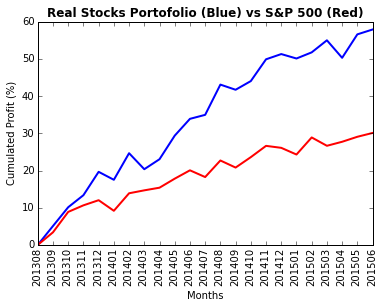

In [167]:
%pylab inline
plt.xticks(range(len(track.month)), track.month, rotation = 'vertical')
plt.title('Real Stocks Portofolio (Blue) vs S&P 500 (Red)', fontweight='bold')
plt.xlabel("Months")
plt.ylabel("Cumulated Profit (%)")
plt.plot(range(len(track.portfolio)), track.portfolio, color = 'b', label = 'Portfolio', lw = 2)
plt.plot(range(len(track.sp500)), track.sp500, color = 'r', label = 'S&P 500', lw = 2)

## S&P 500 Daily 20090223 -> 20090320 Graph

In [168]:
d = list(spd.date[1573:1592])
s = list(spd.c[1573:1592])

In [171]:
maxs = []
mins =[]
middle = []
for i in range(len(s)):
    maxs.append(np.max(s))
    mins.append(np.min(s))
    middle.append((np.max(s) + np.min(s))/2)

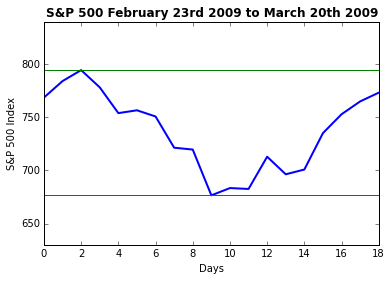

In [170]:
plt.ylim(630,840)
#plt.xticks(range(len(d)), d, rotation = 'vertical')
plt.title('S&P 500 February 23rd 2009 to March 20th 2009', fontweight='bold')
plt.xlabel("Days")
plt.ylabel("S&P 500 Index")
plt.plot(range(len(s)), s, color = 'b', label = 'S&P 500', lw = 2)
plt.plot(range(len(maxs)), maxs, color = 'g', lw = 1)
plt.plot(range(len(mins)), mins, color = 'r', lw = 1)

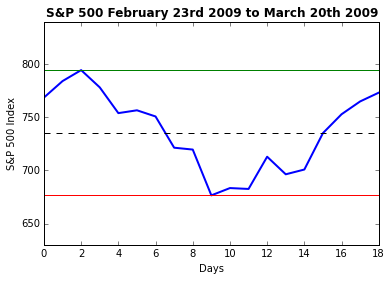

In [172]:
plt.ylim(630,840)
#plt.xticks(range(len(d)), d, rotation = 'vertical')
plt.title('S&P 500 February 23rd 2009 to March 20th 2009', fontweight='bold')
plt.xlabel("Days")
plt.ylabel("S&P 500 Index")
plt.plot(range(len(s)), s, color = 'b', label = 'S&P 500', lw = 2)
plt.plot(range(len(maxs)), maxs, color = 'g', lw = 1)
plt.plot(range(len(mins)), mins, color = 'r', lw = 1)
plt.plot(range(len(middle)), middle, 'k--', lw = 1)